# IDEA
Crawl `Tarim`, `Ekonomi` from wikipedia and compare `TBMM CORPUS`

## Turkish Stopwords

In [ ]:
urllib.urlopen

In [89]:
# Turkish Stopwords
with open('turkce-stop-words.txt') as file:  
    stw = file.read() 
stw = stw.split()
stw = [s.lower() for s in stw] 
stw[:5]

['a', 'acaba', 'altı', 'altmış', 'ama']

## Data form Wikipedia

In [42]:
import time
import urllib

import bs4
import requests
import re

from bs4 import BeautifulSoup

response = requests.get('https://tr.wikipedia.org/wiki/Demokrasi')

In [43]:
html=response.text
soup=BeautifulSoup(html, 'lxml')

In [44]:
a_text = soup.find_all('p')
y=[re.sub(r'<.+?>',r'',str(a)) for a in a_text]

In [45]:
metin = " ".join(y)
metin[:100]

'Demokrasi,  dünyadaki tüm üye veya vatandaşların, organizasyon veya devlet politikasını şekillendirm'

In [46]:
metin = re.sub(r'[^\w\s]','',metin)
metin = metin.split()
metin[:5]

['Demokrasi', 'dünyadaki', 'tüm', 'üye', 'veya']

## Turkish Stemmer

In [48]:
from snowballstemmer import stemmer
kokbul1 = stemmer('turkish')

kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin) if kelime not in stw]
kelimeler[:5]

['demokras', 'dünya', 'vatandaş', 'organizasyo', 'devlet']

## Plot

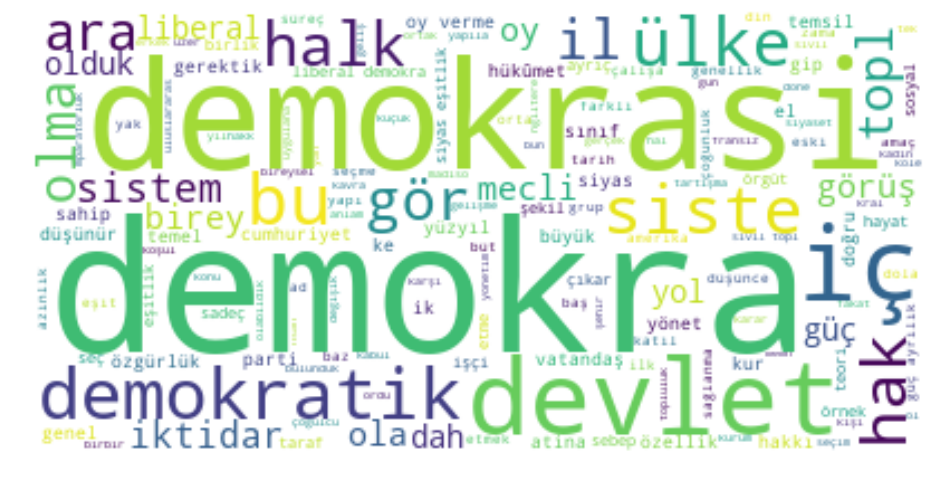

In [60]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))

wordcloud = WordCloud(background_color="white").generate(' '.join(kelimeler))    

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
#?WordCloud

# Functionalize

In [63]:
import time
import urllib
import bs4
import requests
import re
from bs4 import BeautifulSoup

%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Turkish stemmer
from snowballstemmer import stemmer
kokbul1 = stemmer('turkish')

# Tukish stopwords
with open('turkce-stop-words.txt') as file:  
    stw = file.read() 
stw = stw.split()
stw = [s.lower() for s in stw] 

def wiki2cloud(url):
    response = requests.get(url)
    html=response.text
    soup=BeautifulSoup(html, 'lxml')
    a_text = soup.find_all('p')
    y=[re.sub(r'<.+?>',r'',str(a)) for a in a_text]
    metin = " ".join(y)
    metin = re.sub(r'[^\w\s]','',metin)
    metin = metin.split()
                            
    kelimeler = [kelime.lower() for kelime in kokbul1.stemWords(metin) if kelime not in stw]
    

    wordcloud = WordCloud(background_color="white").generate(' '.join(kelimeler))    
    
    plt.figure(figsize=(16,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

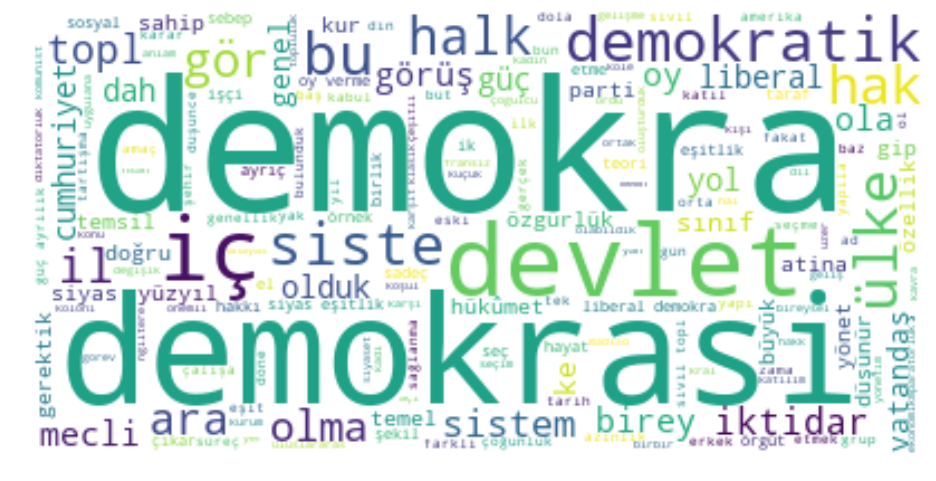

In [64]:
url1 = 'https://tr.wikipedia.org/wiki/Demokrasi'
wiki2cloud(url1)

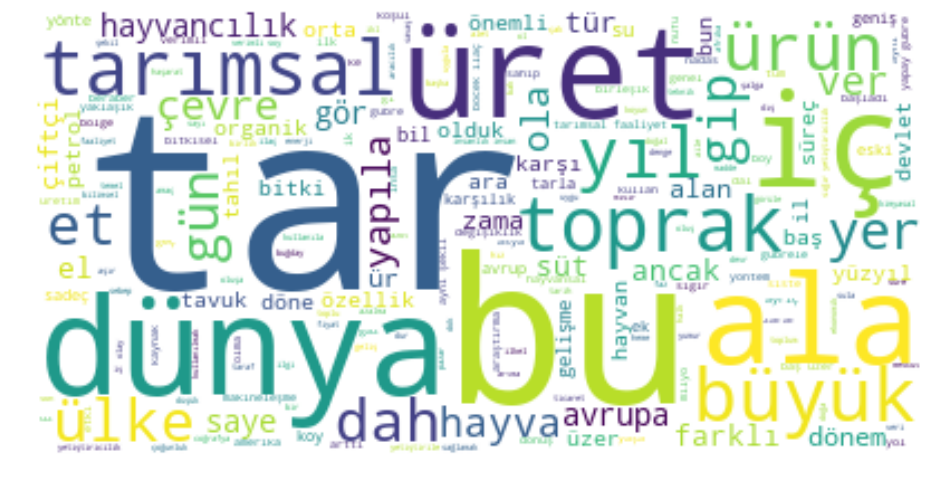

In [65]:
url1 = 'https://tr.wikipedia.org/wiki/Tarım'
wiki2cloud(url1)

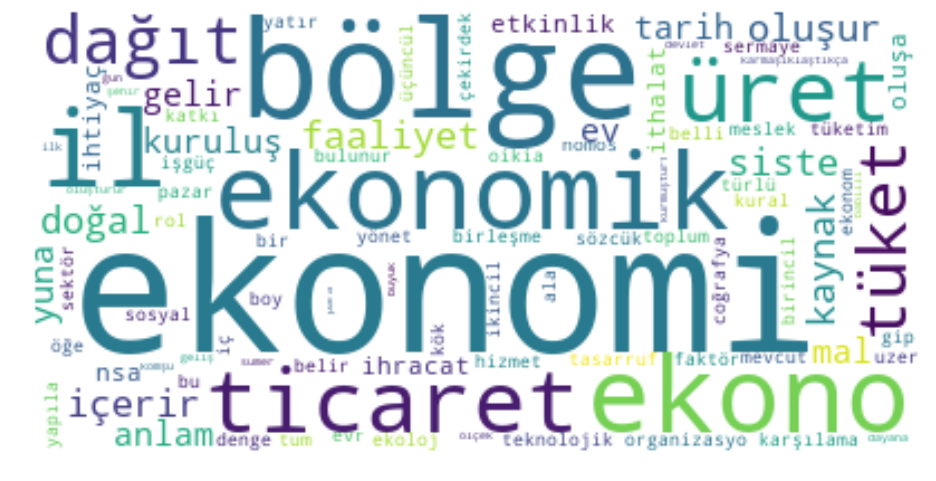

In [66]:
url1 = 'https://tr.wikipedia.org/wiki/Ekonomi'
wiki2cloud(url1)

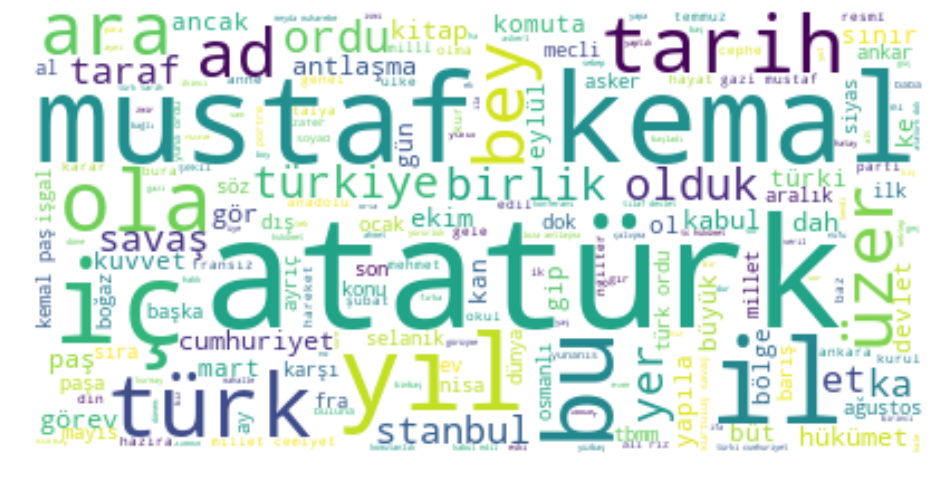

In [70]:
url1 = 'https://tr.wikipedia.org/wiki/Atatürk'
wiki2cloud(url1)

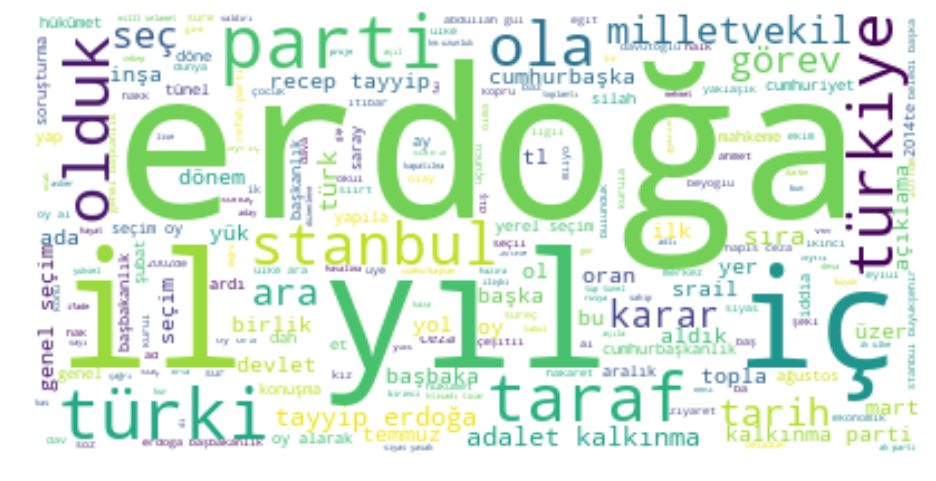

In [71]:
url1 = 'https://tr.wikipedia.org/wiki/Recep_Tayyip_Erdoğan'
wiki2cloud(url1)

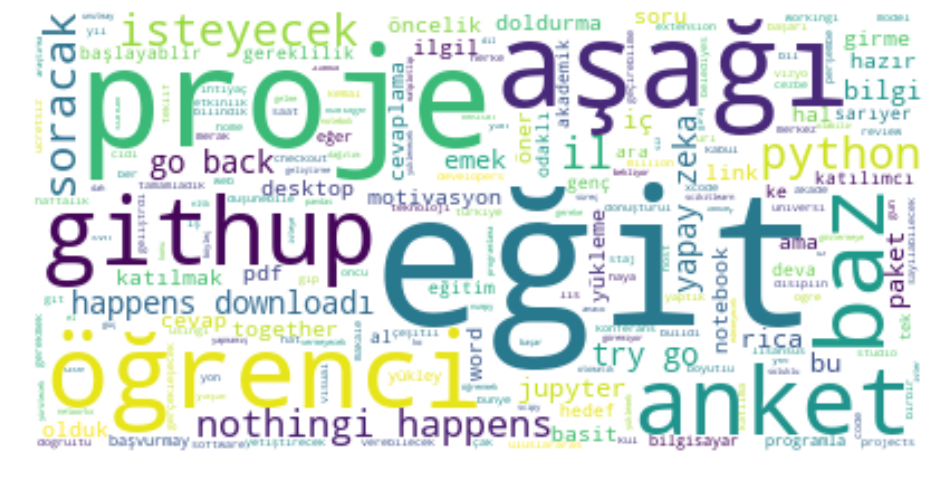

In [69]:
url1 = 'https://bit.ly/yapayzeka3'
wiki2cloud(url1)